In [1]:
! pip install translators --upgrade

  Created wheel for PyExecJS: filename=PyExecJS-1.5.1-py3-none-any.whl size=14598 sha256=85739b59ee6cff5165f3d3477b2cd244c3a7daac278684fdea047696c8bf942f
  Stored in directory: c:\users\kelvin\appdata\local\pip\cache\wheels\db\3c\3d\7e9aca234caf6602ae4a4c7b367b3afc03519e791b998a94e4
Successfully built PyExecJS


In [1]:
import translators as ts
from os import path
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np

ts._google.language_map

Using Singapore server backend.


In [2]:
import pandas as pd

df=pd.read_excel('geo location 2021 tweets wo emoji.xlsx')  

df

,Datetime,Tweet Id,Text,Username
0,2020-12-28 11:18:09,1.343517e+18,Baru jumpa line. Hahahahah,ajibkiddo
1,2020-12-25 07:28:37,1.342372e+18,"Alhamdulillah berkesempatan hari nie, rindu ka...",syaufeharriz
2,2020-12-22 07:14:52,1.341281e+18,"Selamat Hari Ibu, BU JEANNE :heart suit: @ Mad...",fabimanjoe
3,2020-12-22 04:37:23,1.341241e+18,sosuke yamazaki i am @ ur store https://t.co/z...,ERWYSMITH
4,2020-12-17 02:52:36,1.339403e+18,Baru saja mengirim foto @ Hard Rock Hotel Sing...,LiburWeekend
...,...,...,...,...
243,2020-01-02 08:40:10,1.212655e+18,"Muka lawan suhu 15°. Sejuk biasa² ja nie, dulu...",momo_roro15
244,2020-01-01 15:57:09,1.212402e+18,Selamat tahun baru MMXX @ Universal Studio Sin...,izzulf_ismail
245,2020-01-01 07:41:57,1.212278e+18,Takpayah azam azam lah. Sebab tadi aku tanya d...,ZalAnnas
246,2020-01-01 03:07:13,1.212209e+18,Ayuhhhhh!! (@ Sentosa Station in Singapore) ht...,amazingsyathiri


In [3]:
text_col = pd.DataFrame(df, columns = ['Text'])

text_col


,Text
0,Baru jumpa line. Hahahahah
1,"Alhamdulillah berkesempatan hari nie, rindu ka..."
2,"Selamat Hari Ibu, BU JEANNE :heart suit: @ Mad..."
3,sosuke yamazaki i am @ ur store https://t.co/z...
4,Baru saja mengirim foto @ Hard Rock Hotel Sing...
...,...
243,"Muka lawan suhu 15°. Sejuk biasa² ja nie, dulu..."
244,Selamat tahun baru MMXX @ Universal Studio Sin...
245,Takpayah azam azam lah. Sebab tadi aku tanya d...
246,Ayuhhhhh!! (@ Sentosa Station in Singapore) ht...


In [4]:
text_col['english_text'] = text_col['Text'].apply(lambda x: ts.google(x, from_language='id', to_language='en'))

text_col

,Text,english_text
0,Baru jumpa line. Hahahahah,Just meet LINE. Hahahahah
1,"Alhamdulillah berkesempatan hari nie, rindu ka...","Alhamdulillah, I had the opportunity for today..."
2,"Selamat Hari Ibu, BU JEANNE :heart suit: @ Mad...","Happy Mother's Day, Mrs. Jeanne: Heart Suit: @..."
3,sosuke yamazaki i am @ ur store https://t.co/z...,sosuke yamazaki i am @ ur store https://t.co/z...
4,Baru saja mengirim foto @ Hard Rock Hotel Sing...,Just sent a photo of @ hard rock hotel singapo...
...,...,...
243,"Muka lawan suhu 15°. Sejuk biasa² ja nie, dulu...","Face opponent temperature 15 °. Cool, ordinary..."
244,Selamat tahun baru MMXX @ Universal Studio Sin...,Happy New Year Mmxx @ Universal Studio Singapo...
245,Takpayah azam azam lah. Sebab tadi aku tanya d...,"Takpayah Azam Azam. Because I asked earlier, A..."
246,Ayuhhhhh!! (@ Sentosa Station in Singapore) ht...,Ayuhhhhh !! (@ Sentosa Station in Singapore) h...


In [9]:
text_col.to_excel('geo location 2021 tweets wo emoji translated.xlsx', sheet_name='sheet1', index=False)


In [5]:
t_df = pd.DataFrame(text_col, columns = ['english_text'])

t_df

,english_text
0,Just meet LINE. Hahahahah
1,"Alhamdulillah, I had the opportunity for today..."
2,"Happy Mother's Day, Mrs. Jeanne: Heart Suit: @..."
3,sosuke yamazaki i am @ ur store https://t.co/z...
4,Just sent a photo of @ hard rock hotel singapo...
...,...
243,"Face opponent temperature 15 °. Cool, ordinary..."
244,Happy New Year Mmxx @ Universal Studio Singapo...
245,"Takpayah Azam Azam. Because I asked earlier, A..."
246,Ayuhhhhh !! (@ Sentosa Station in Singapore) h...


In [6]:
text = t_df["english_text"].to_string(index=False)

print ("There are {} words in the combination of all tweets.".format(len(text)))

There are 12647 words in the combination of all tweets.


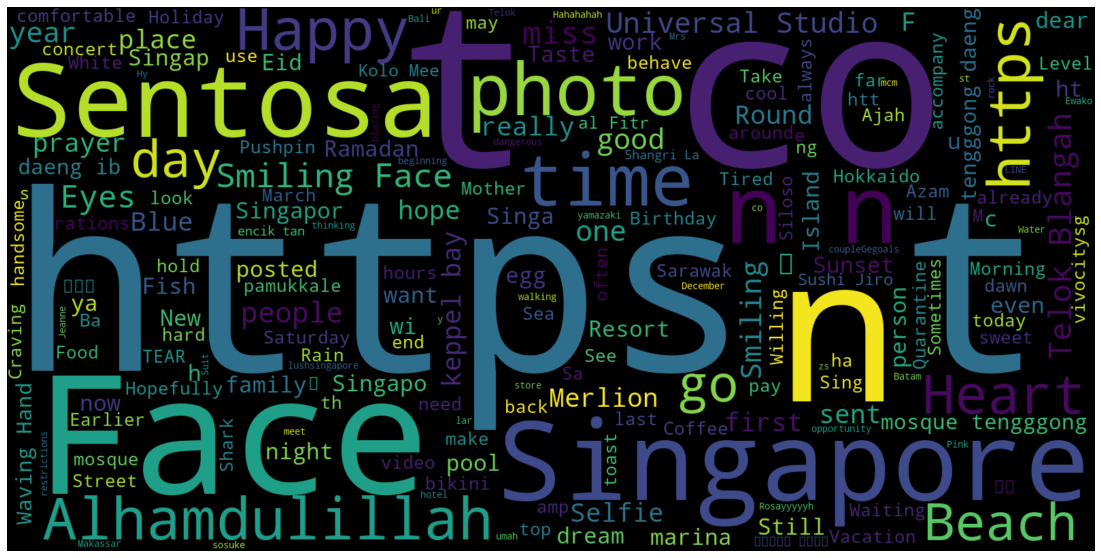

In [10]:
wordcloud = WordCloud(width=1600, height=800).generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

plt.show()

In [11]:
word_count = WordCloud().process_text(text)

word_count

{'meet': 1,
 'LINE': 1,
 'Hahahahah': 1,
 'Alhamdulillah': 9,
 'opportunity': 1,
 'today': 2,
 'Happy': 9,
 'Mother': 2,
 'day': 7,
 'Mrs': 1,
 'Jeanne': 1,
 'Heart': 8,
 'Suit': 1,
 'sosuke': 1,
 'yamazaki': 1,
 'ur': 1,
 'store': 1,
 'https': 9,
 'co': 1,
 'zs': 1,
 'sent': 4,
 'photo': 10,
 'hard': 2,
 'rock': 1,
 'hotel': 1,
 'Singapor': 3,
 'posted': 3,
 'mosque': 2,
 'mcm': 1,
 'umah': 1,
 'coupleGegoals': 1,
 'lar': 1,
 'Hokkaido': 2,
 'ya': 3,
 'Telok': 1,
 'Singapore': 16,
 'lushsingapore': 1,
 'Singapo': 3,
 'Saturday': 2,
 'Rosayyyyyh': 1,
 'n': 29,
 'Blue': 4,
 'Water': 1,
 'Pink': 1,
 'beginning': 1,
 'December': 1,
 'last': 2,
 'y': 1,
 'restrictions': 1,
 'Hy': 1,
 'Bali': 1,
 'Batam': 1,
 'blazing': 1,
 'Ewako': 1,
 'Makassar': 1,
 'work': 3,
 'walking': 1,
 'dangerous': 1,
 'st': 1,
 'miss': 6,
 'thinking': 1,
 'Face': 18,
 '又': 1,
 '嚟': 1,
 'tamjai': 1,
 'samgor': 1,
 'mixian': 1,
 'vivo': 1,
 'city': 1,
 'Singa': 3,
 'going': 1,
 'go': 7,
 'BTS': 1,
 'Yuta': 1,
 'Pho

In [ ]:
df_filtered = text_col[~text_col['english_text'].str.contains('total')]

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)